In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from haversine import haversine, Unit
import geopandas as gpd
from pyproj import Proj, transform
import contextily as ctx
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import pacf,acf
pd.set_option('display.max_columns', None)

In [80]:
stream_df = pd.read_pickle(os.path.join('..','data','processed','stream_processed.pkl'),compression='zip')
stream_df['Datum'] = pd.to_datetime(stream_df['Datum'])
stream_df = stream_df.set_index('Datum')
stream_df.head()

measurement_location,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,15216009,15217908,15221009,15228008,15241006,15242304,15243001,15246000,15247002,15247501
Datum,,,,,,,,,,,,,,,,,,,
2014-01-01,14.4,17.2,19.8,3.87,8.66,9.66,0.433,2.35,0.207,1.66,0.921,0.671,2.59,0.253,0.870,1.26,2.35,0.355,0.120
2014-01-02,14.4,17.0,19.3,3.78,8.52,9.46,0.435,2.51,0.204,1.62,0.909,0.664,2.57,0.253,0.870,1.23,2.32,0.361,0.131
2014-01-03,14.1,16.6,19.3,3.78,8.40,9.42,0.429,2.61,0.201,1.60,0.907,0.641,2.58,0.253,0.871,1.23,2.30,0.362,0.130
2014-01-04,14.2,16.6,19.3,3.84,8.57,9.50,0.445,2.49,0.214,1.64,0.935,0.642,2.60,0.256,0.929,1.26,2.44,0.382,0.127
2014-01-05,16.4,18.4,20.6,4.36,9.94,10.80,0.545,2.86,0.267,1.80,1.130,0.690,3.10,0.300,1.150,1.61,3.14,0.561,0.175


In [74]:
rolling_df = stream_df
rolling_df['Datum'] = pd.to_datetime(rolling_df['Datum'])
rolling_df[list(stream_df.columns[1:])] = stream_df[list(stream_df.columns[1:])].rolling(window=3).mean()
rolling_df = rolling_df.dropna().iloc[:-1]
rolling_df = rolling_df.set_index('Datum')
rolling_df

measurement_location,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,15216009,15217908,15221009,15228008,15241006,15242304,15243001,15246000,15247002,15247501
Datum,,,,,,,,,,,,,,,,,,,
2014-01-03,14.300000,16.933333,19.466667,3.810000,8.526667,9.513333,0.432333,2.490000,0.204000,1.626667,0.912333,0.658667,2.580000,0.253000,0.870333,1.240000,2.323333,0.359333,0.127000
2014-01-04,14.233333,16.733333,19.300000,3.800000,8.496667,9.460000,0.436333,2.536667,0.206333,1.620000,0.917000,0.649000,2.583333,0.254000,0.890000,1.240000,2.353333,0.368333,0.129333
2014-01-05,14.900000,17.200000,19.733333,3.993333,8.970000,9.906667,0.473000,2.653333,0.227333,1.680000,0.990667,0.657667,2.760000,0.269667,0.983333,1.366667,2.626667,0.435000,0.144000
2014-01-06,16.300000,18.800000,21.433333,4.193333,9.736667,10.600000,0.504667,2.740000,0.239333,1.740000,1.061667,0.670667,2.900000,0.281000,1.056333,1.476667,2.866667,0.477000,0.152667
2014-01-07,16.733333,19.800000,22.966667,4.260000,10.083333,10.900000,0.515333,2.776667,0.241000,1.750000,1.086667,0.670667,2.930000,0.286667,1.083333,1.540000,2.963333,0.493333,0.156000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,139.733333,211.000000,240.000000,45.500000,79.500000,100.166667,3.023333,32.000000,2.451000,12.270000,9.693333,7.713333,21.700000,1.484667,7.530000,19.966667,23.933333,3.910000,1.762000
2023-12-28,100.966667,150.000000,172.666667,33.833333,56.900000,71.533333,2.296667,22.633333,1.164667,10.370000,7.316667,5.253333,15.633333,1.023333,4.453333,13.850000,17.433333,2.633333,1.035667
2023-12-29,82.100000,107.500000,126.233333,29.033333,47.366667,58.733333,1.940000,18.133333,0.838333,10.020000,6.206667,4.116667,12.666667,0.804333,3.386667,10.293333,13.023333,2.100000,0.772000


In [75]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(rolling_df),columns= list(stream_df.columns[1:]),index = rolling_df.index)
scaled_df

,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,15216009,15217908,15221009,15228008,15241006,15242304,15243001,15246000,15247002,15247501
Datum,,,,,,,,,,,,,,,,,,,
2014-01-03,0.040191,0.041989,0.042342,0.037322,0.066922,0.047145,0.030829,0.035445,0.025487,0.055002,0.025213,0.042860,0.046015,0.021389,0.034805,0.028402,0.044152,0.026943,0.024790
2014-01-04,0.039890,0.041261,0.041751,0.037173,0.066696,0.046830,0.031359,0.036443,0.026001,0.054612,0.025431,0.041944,0.046115,0.021527,0.035946,0.028402,0.044814,0.027942,0.025361
2014-01-05,0.042899,0.042960,0.043287,0.040052,0.070263,0.049466,0.036217,0.038937,0.030628,0.058118,0.028886,0.042766,0.051429,0.023684,0.041364,0.031929,0.050851,0.035344,0.028949
2014-01-06,0.049216,0.048787,0.049312,0.043029,0.076041,0.053557,0.040413,0.040790,0.033272,0.061624,0.032215,0.043997,0.055639,0.025244,0.045601,0.034992,0.056152,0.040007,0.031069
2014-01-07,0.051172,0.052428,0.054747,0.044022,0.078654,0.055327,0.041827,0.041574,0.033639,0.062208,0.033388,0.043997,0.056541,0.026025,0.047168,0.036755,0.058287,0.041821,0.031885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.606209,0.748722,0.823969,0.658048,0.601818,0.582047,0.374144,0.666436,0.520602,0.676885,0.436976,0.711317,0.621053,0.190985,0.421336,0.549842,0.521450,0.421170,0.424774
2023-12-28,0.431275,0.526578,0.585322,0.484342,0.431491,0.413095,0.277859,0.466155,0.237165,0.565869,0.325528,0.478222,0.438596,0.127461,0.242764,0.379525,0.377885,0.279423,0.247085
2023-12-29,0.346139,0.371806,0.420750,0.412874,0.359643,0.337569,0.230599,0.369935,0.165259,0.545419,0.273478,0.370519,0.349373,0.097306,0.180854,0.280490,0.280482,0.220207,0.182582


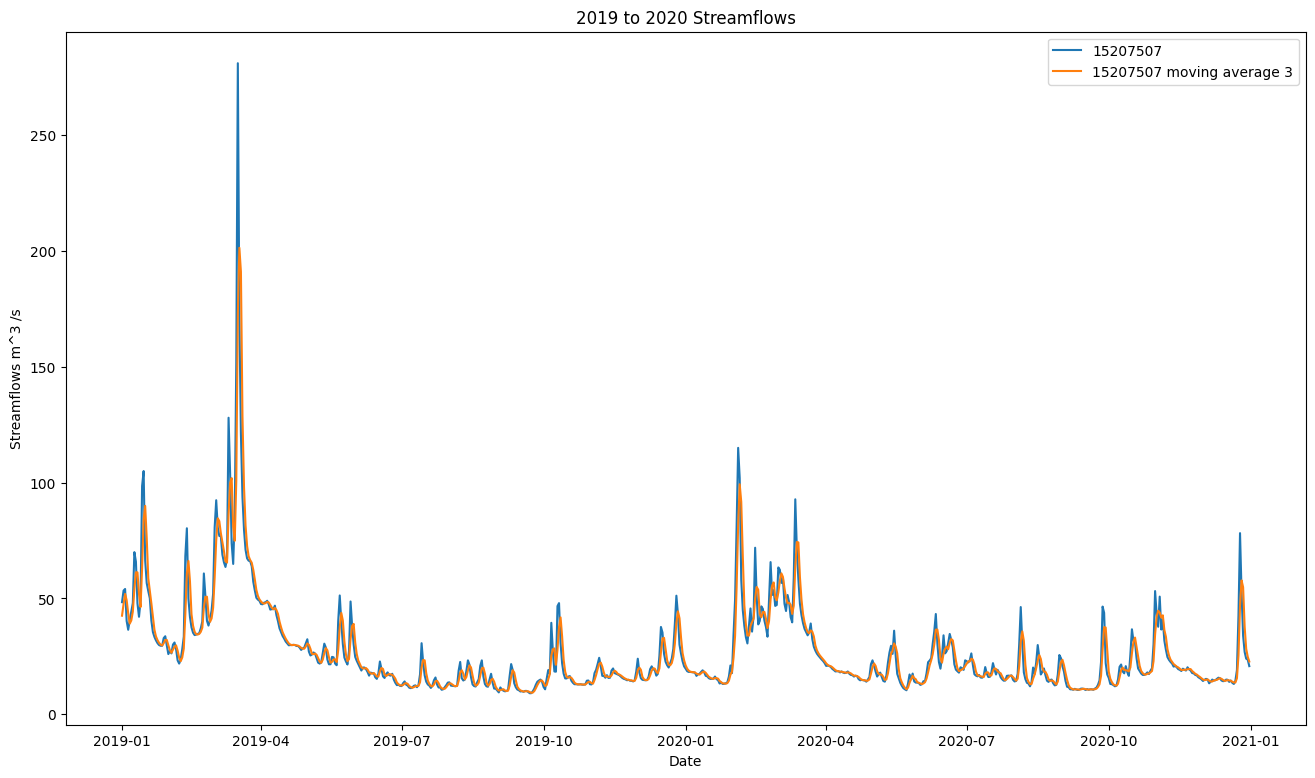

In [84]:

plt.figure(figsize=(16, 9))
plt.plot(stream_df['15207507']['2019':'2020'], label='15207507')
plt.plot(rolling_df['15207507']['2019':'2020'], label='15207507 moving average 3')
plt.legend()

# Adding title and labels for better readability
plt.title('2019 to 2020 Streamflows')
plt.xlabel('Date')
plt.ylabel('Streamflows m^3 /s')


# Display the plot
plt.show()


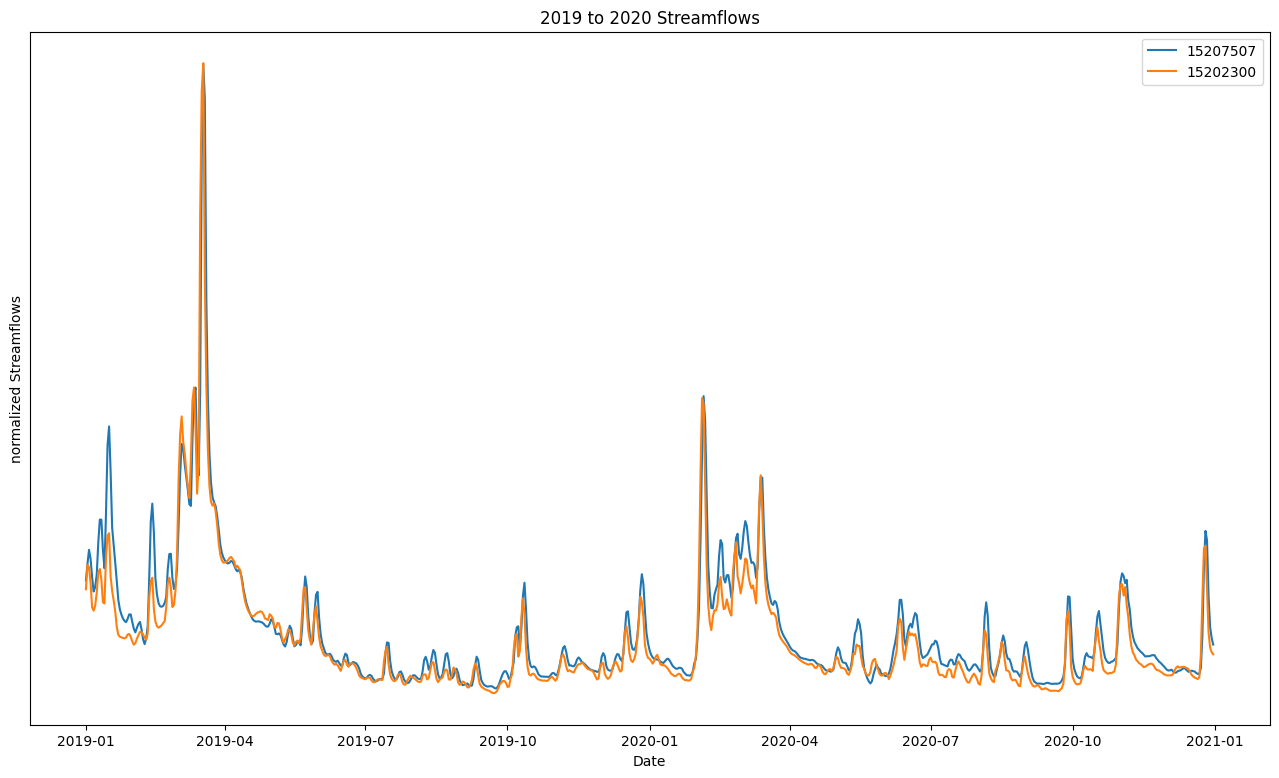

In [86]:
plt.figure(figsize=(16, 9))

# Plotting data for the year range 2019 to 2020
plt.plot(scaled_df['15207507']['2019':'2020'], label='15207507')
plt.plot(scaled_df['15202300']['2019':'2020'], label='15202300')

# Adding legend
plt.legend()

# Adding title and labels for better readability
plt.title('2019 to 2020 Streamflows')
plt.xlabel('Date')
plt.ylabel('normalized Streamflows')

# Removing y-axis scale
plt.yticks([])

# Display the plot
plt.show()

In [7]:
stream_gauges = pd.read_csv(os.path.join('..','data','processed','stream_flow_stations_ETRS89.csv'),sep = ';')
stream_gauges.head()

,measurement_location,name,lon,lat
0,15202300,Chamerau,772999,5454387
1,15205501,Kienhof,754654,5454455
2,15207507,Marienthal,731151,5457076
3,15210206,Zwiesel,808629,5437159
4,15212008,Teisnach,792241,5439862


In [8]:
def calculate_distance(lon,lat, ref_point):
    easting_diff = lon - ref_point[0]
    northing_diff = lat - ref_point[1]
    distance_m = np.sqrt(easting_diff**2 + northing_diff**2)
    distance_km = distance_m / 1000  # Convert meters to kilometers
    return distance_km

In [9]:
ref_point = stream_gauges.loc[stream_gauges['measurement_location'] == 15207507][['lon','lat']].values[0]
stream_gauges['distance_to_ref'] = stream_gauges.apply(lambda row : calculate_distance(row['lon'],row['lat'],ref_point),axis = 1)
stream_gauges = stream_gauges.sort_values('distance_to_ref')
stream_gauges

,measurement_location,name,lon,lat,distance_to_ref
2,15207507,Marienthal,731151,5457076,0.000000
1,15205501,Kienhof,754654,5454455,23.648692
17,15246000,Kothmaissling,771733,5460893,40.761112
0,15202300,Chamerau,772999,5454387,41.934304
16,15243001,Furth im Wald,778880,5468131,48.992555
12,15228008,Koetzting,780850,5453366,49.837282
15,15242508,Drachensee Speicherabfluss,780824,5470072,51.344941
14,15242304,Eschlkam,783449,5468105,53.448289
19,15247501,Oesbuehl,783028,5470376,53.554768
18,15247002,Leming,784900,5466230,54.522938


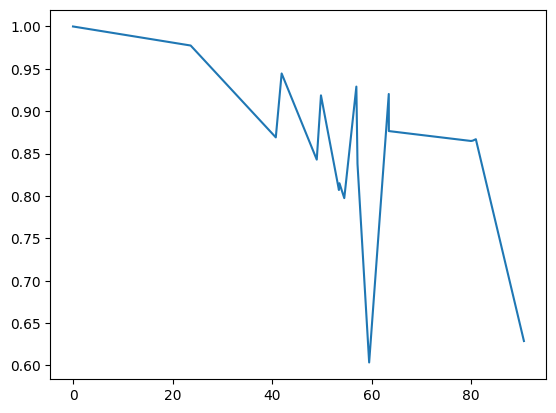

In [178]:
corr_matrix_with_15207507 = rolling_df.corr().loc[:, ['15207507']].reset_index()
corr_matrix_with_15207507['measurement_location'] = corr_matrix_with_15207507['measurement_location'].astype(pd.Int64Dtype())
corr_sorted = corr_matrix_with_15207507.merge(stream_gauges,on ='measurement_location')
corr_sorted = corr_sorted.rename(columns={'15207507' : 'correlation'})
plt.plot(corr_sorted.sort_values('distance_to_ref')['distance_to_ref'].values,corr_sorted.sort_values('distance_to_ref')['correlation'].values)


In [126]:
lag_df = rolling_df.copy()
lag_df['15207507'] = lag_df['15207507'].shift(-1).dropna()
corr_matrix_with_15207507_lag_1 = lag_df.corr().loc[:, ['15207507']].reset_index()
corr_matrix_with_15207507_lag_1['measurement_location'] = corr_matrix_with_15207507_lag_1['measurement_location'].astype(pd.Int64Dtype())
corr_matrix_with_15207507_lag_1 = corr_matrix_with_15207507_lag_1.merge(stream_gauges,on ='measurement_location')
corr_matrix_with_15207507_lag_1 = corr_matrix_with_15207507_lag_1.rename(columns={'15207507' : 'correlation'})
# corr_matrix_with_15207507_lag_1

,measurement_location,correlation,name,lon,lat,distance_to_ref
0,15202300,0.969893,Chamerau,772999,5454387,41.934304
1,15205501,0.945762,Kienhof,754654,5454455,23.648692
2,15207507,1.000000,Marienthal,731151,5457076,0.000000
3,15210206,0.897224,Zwiesel,808629,5437159,79.997046
4,15212008,0.952482,Teisnach,792241,5439862,63.468968
5,15212700,0.963248,Saegmuehle,786279,5442774,56.952995
6,15213500,0.920602,Aitnach,786177,5441528,57.180425
7,15214003,0.893945,Zwiesel,809253,5438135,80.365937
8,15214604,0.684157,Hirschbach,819642,5437482,90.634331
9,15216009,0.901039,Lohmannmuehle,809629,5437141,80.970369


In [144]:
def calculate_lag_correlation(df, lag):
    lag_df = df.copy()
    lag_df['15207507'] = lag_df['15207507'].shift(-lag).dropna()
    corr_matrix = lag_df.corr().loc[:, ['15207507']].reset_index()
    corr_matrix['measurement_location'] = corr_matrix['measurement_location'].astype(pd.Int64Dtype())
    corr_matrix = corr_matrix.merge(stream_gauges, on='measurement_location', how='left')
    corr_matrix = corr_matrix.rename(columns={'15207507': 'correlation'})
    corr_matrix['lag'] = lag
    return corr_matrix['correlation']

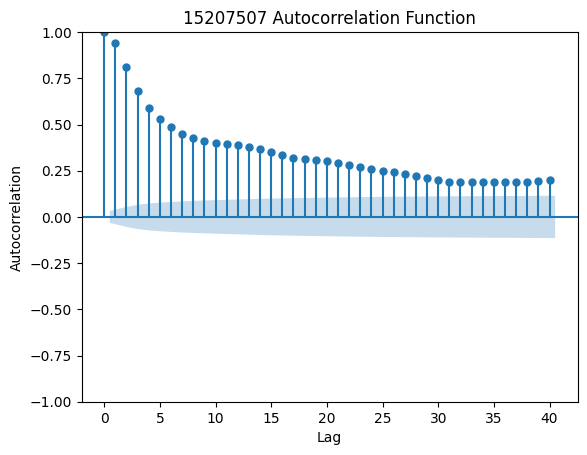

In [176]:
time_series = rolling_df['15207507']

# Plot the PACF
plot_acf(time_series, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('15207507 Autocorrelation Function')
plt.show()

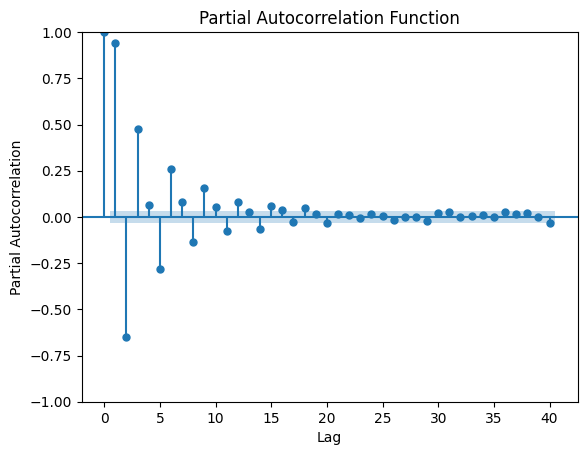

In [177]:
time_series = rolling_df['15207507']

# Plot the PACF
plot_pacf(time_series, lags=40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function')
plt.show()

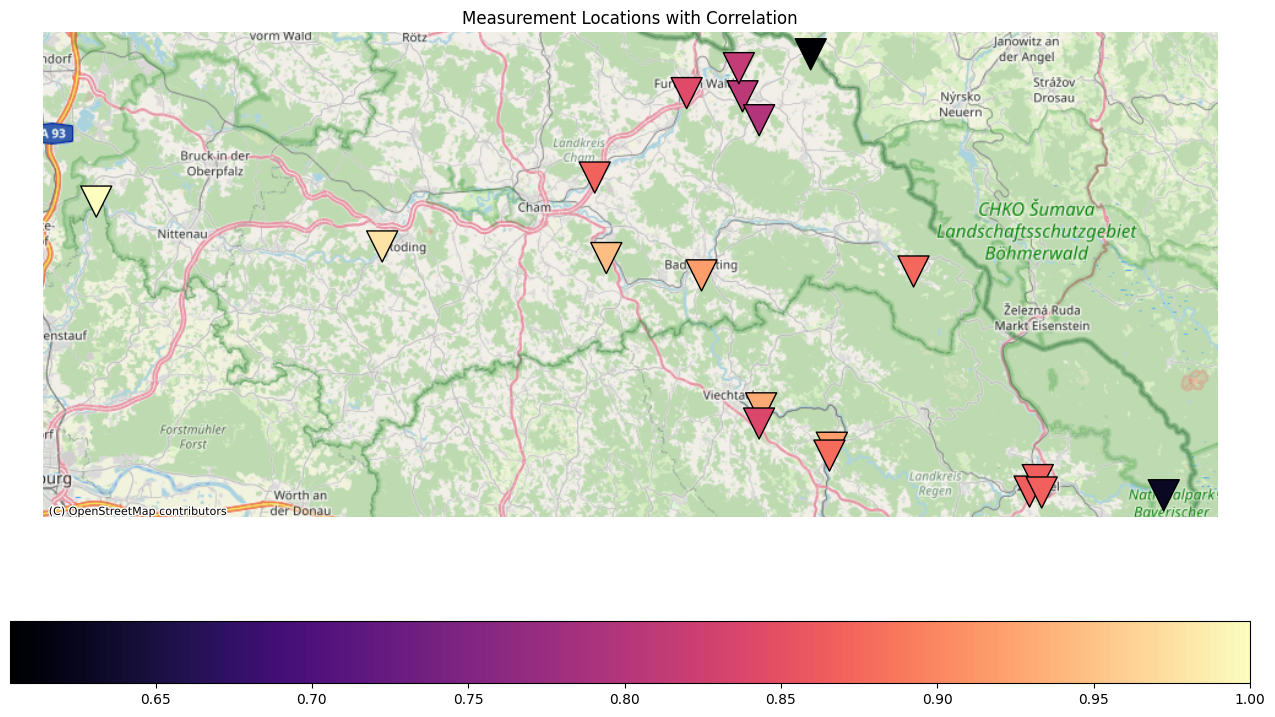

In [50]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(corr_sorted, geometry=gpd.points_from_xy(corr_sorted['lon'], corr_sorted['lat']), crs="EPSG:32632")

# Convert to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting


fig, ax = plt.subplots(1, 1, figsize=(16, 9))
gdf.plot(ax=ax, column='correlation', cmap='magma', legend=True, markersize=500,marker = 'v',edgecolor='black',legend_kwds={'location': 'bottom'})

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.DE)

# Customize plot
plt.title("Measurement Locations with Correlation")
ax.set_axis_off()

# Show plot
plt.show()

In [99]:
means = rolling_df.mean().reset_index()
means['measurement_location'] = means['measurement_location'].astype(pd.Int64Dtype())
streamflows_means = corr_sorted.merge(means)
streamflows_means = streamflows_means.rename(columns={0: 'mean_streamflow'})
streamflows_means.to_csv(os.path.join('..','data','processed','stream_flow_mean.csv'))

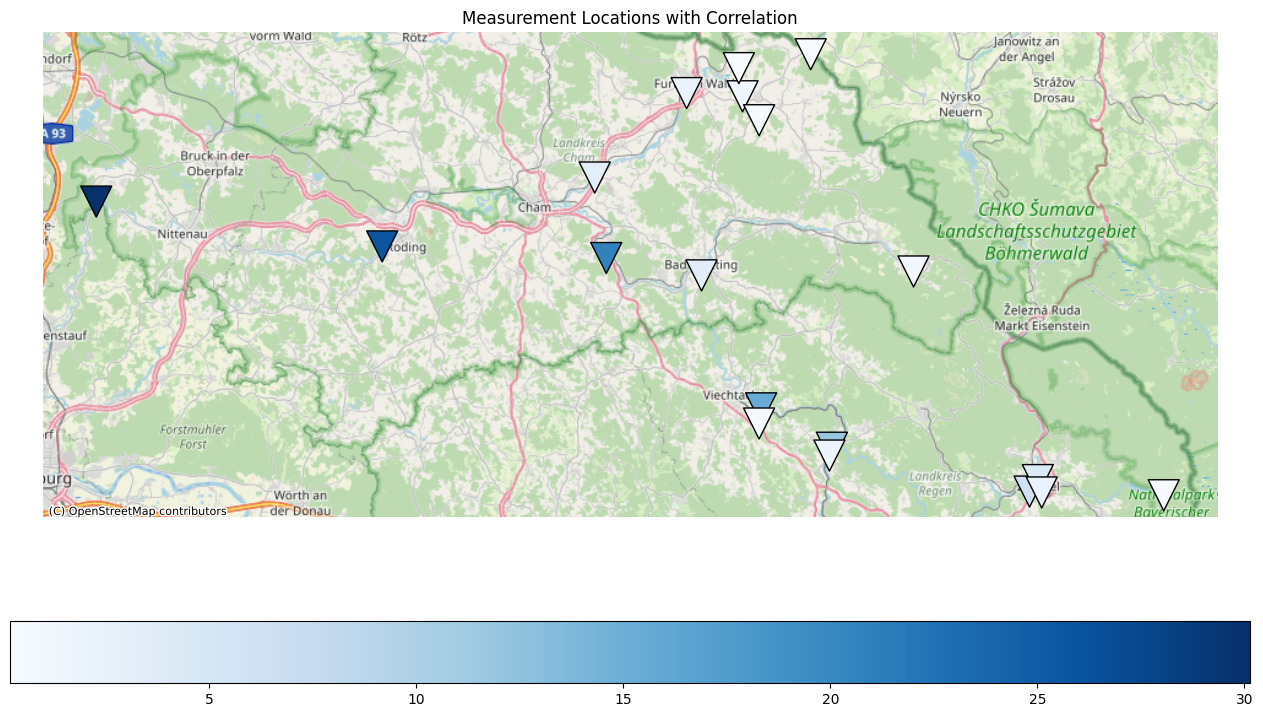

In [102]:
gdf = gpd.GeoDataFrame(streamflows_means, geometry=gpd.points_from_xy(streamflows_means['lon'], streamflows_means['lat']), crs="EPSG:32632")

# Convert to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting


fig, ax = plt.subplots(1, 1, figsize=(16, 9))
gdf.plot(ax=ax, column='mean_streamflow', cmap='Blues', legend=True, markersize=500,marker = 'v',edgecolor='black',legend_kwds={'location': 'bottom'})

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.DE)

# Customize plot
plt.title("Measurement Locations with Correlation")
ax.set_axis_off()

# Show plot
plt.show()

In [148]:
corr_lags = streamflows_means.copy()
for lag in range(1,10):
    corr_lags[f"corr_lag_{lag}"] = calculate_lag_correlation(rolling_df,lag)
corr_lags

,measurement_location,correlation,name,lon,lat,distance_to_ref,mean_streamflow,corr_lag_1,corr_lag_2,corr_lag_3,corr_lag_4,corr_lag_5,corr_lag_6,corr_lag_7,corr_lag_8,corr_lag_9
0,15202300,0.944552,Chamerau,772999,5454387,41.934304,20.826813,0.969893,0.876877,0.735215,0.613171,0.540258,0.497477,0.467342,0.443027,0.423902
1,15205501,0.977523,Kienhof,754654,5454455,23.648692,25.880553,0.945762,0.824893,0.687268,0.589371,0.532038,0.496698,0.469587,0.448458,0.434205
2,15207507,1.000000,Marienthal,731151,5457076,0.000000,30.136487,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,15210206,0.864875,Zwiesel,808629,5437159,79.997046,6.182950,0.897224,0.820244,0.688645,0.565175,0.487373,0.441637,0.409786,0.381574,0.358009
4,15212008,0.920327,Teisnach,792241,5439862,63.468968,11.883991,0.952482,0.872437,0.740563,0.620799,0.547048,0.504608,0.476660,0.454114,0.435892
5,15212700,0.929058,Saegmuehle,786279,5442774,56.952995,15.415622,0.963248,0.882051,0.748280,0.627578,0.553964,0.511969,0.484529,0.462573,0.444351
6,15213500,0.837955,Aitnach,786177,5441528,57.180425,0.656230,0.920602,0.878690,0.759285,0.631832,0.548297,0.497642,0.463065,0.435696,0.415768
7,15214003,0.865291,Zwiesel,809253,5438135,80.365937,4.205940,0.893945,0.818726,0.692228,0.573775,0.498471,0.453167,0.420988,0.392954,0.370389
8,15214604,0.628780,Hirschbach,819642,5437482,90.634331,0.387997,0.684157,0.621344,0.497142,0.378157,0.305263,0.261994,0.230246,0.204091,0.185617
9,15216009,0.866977,Lohmannmuehle,809629,5437141,80.970369,2.170481,0.901039,0.826233,0.695054,0.571110,0.493345,0.448771,0.418408,0.391268,0.368123


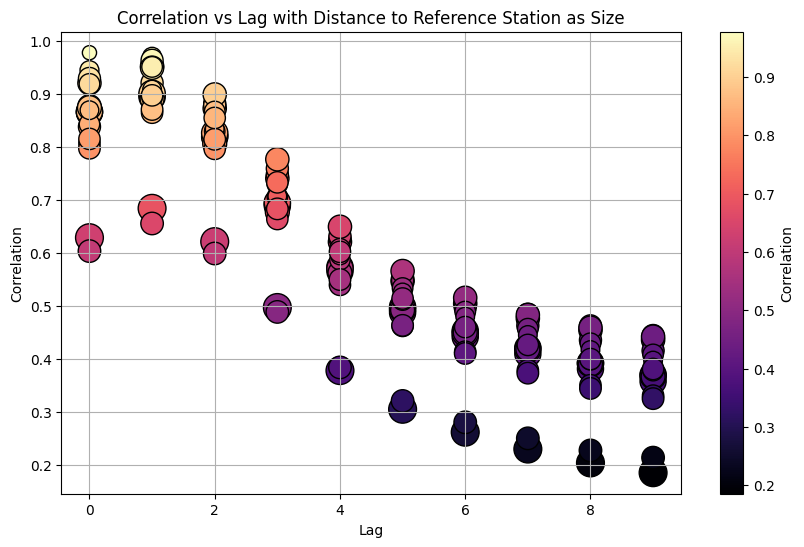

In [175]:
corr_lags.rename(columns={'correlation': 'corr_lag_0'}, inplace=True)
corr_lags = corr_lags.loc[corr_lags['measurement_location'] != 15207507]

df_long = pd.melt(corr_lags, id_vars=['measurement_location', 'name', 'lon', 'lat', 'distance_to_ref', 'mean_streamflow'], 
                  value_vars=['corr_lag_0', 'corr_lag_1', 'corr_lag_2', 'corr_lag_3', 'corr_lag_4', 'corr_lag_5', 'corr_lag_6', 'corr_lag_7', 'corr_lag_8', 'corr_lag_9'],
                  var_name='lag', value_name='correlation')

# Convert lag from string to numeric
df_long['lag'] = df_long['lag'].str.extract('(\d+)').astype(int)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(df_long['lag'], df_long['correlation'], 
                 s=df_long['distance_to_ref']/max(df_long['distance_to_ref'])*400,  # scale size for better visibility
                 alpha=1, edgecolors="black", c=df_long['correlation'], cmap='magma')

plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Correlation vs Lag with Distance to Reference Station as Size')
plt.colorbar(sc, label='Correlation')
plt.grid(True)
plt.show()